# Data prep

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
# import data
uk = pd.read_csv("BigGardenBirdwatch2025_full_UK_results.csv")
country = pd.read_csv("BigGardenBirdwatch2025_full_country_results.csv")
top10 = pd.read_csv("BigGardenWatch_2022-2025_top10.csv")
county = pd.read_csv("BigGardenBirdwatch2025_full_county_results.csv")

# combine all data sets
df = pd.concat([uk, country, county]).reset_index(drop=True)
df = pd.merge(df, top10[["Region_name", "Species", "Top10",]], 
              left_on=["Region_name", "Species"], right_on=["Region_name", "Species"], 
              how="left").drop_duplicates().reset_index(drop=True)
df["Top10"] = df["Top10"].fillna(0)

top10 = pd.merge(top10, df[["Region_name", "Species", "2025_perc_gardens","perc_change_n", "change_perc_gardens"]],
                 left_on=["Region_name", "Species"], right_on=["Region_name", "Species"],
                 how="left")

In [ ]:
top10_2025_stats = top10[[]]

Index(['Species', 'Region_name', 'Region_type', '2025_mean_n', '2025_rank',
       '2025_perc_gardens', '2024_mean_n', '2024_rank', '2024_perc_gardens',
       'perc_change_n', 'rank_change', 'change_perc_gardens', 'Top10'],
      dtype='object')

In [65]:
top10.columns

Index(['Species', 'Count', 'Region_name', 'Year', 'Top10', 'Rank',
       '2025_perc_gardens', 'perc_change_n', 'change_perc_gardens'],
      dtype='object')

## Explore

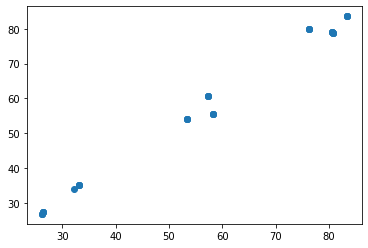

In [43]:
region = "England"
pivot = df[(df["Top10"]==1) & (df["Region_name"]==region)]

fig, ax = plt.subplots()
ax.scatter(pivot["2025_perc_gardens"], pivot["2024_perc_gardens"])

In [64]:
pivot = top10
pivot

,Species,Count,Region_name,Year,Top10,Rank,2025_perc_gardens,perc_change_n,change_perc_gardens
0,House_sparrow,"1,211,260",UK,2025,1,1,59.4,-11.30%,-4.80%
1,Blue_tit,"946,698",UK,2025,1,2,76.2,-8.60%,-4.50%
2,Woodpigeon,"859,780",UK,2025,1,3,78.4,8.70%,2.30%
3,Starling,"784,741",UK,2025,1,4,34.4,-5.70%,-3.50%
4,Blackbird,"732,472",UK,2025,1,5,81.8,9.30%,3.00%
...,...,...,...,...,...,...,...,...,...
195,Goldfinch,"13,528",N Ireland,2022,1,6,35.2,6.00%,3.70%
196,Great_tit,"11,761",N Ireland,2022,1,7,57.2,-15.90%,-7.70%
197,Robin,"10,645",N Ireland,2022,1,8,90.8,10.90%,1.10%
198,Magpie,"9,400",N Ireland,2022,1,9,67.3,4.70%,3.10%
